In [2]:

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, LogisticRegression, Lasso, LinearRegression,  ElasticNet
from sklearn.model_selection import train_test_split,  cross_val_score, KFold,  RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, StratifiedGroupKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
arquivo = pd.read_csv('bases/05.csv', encoding="iso-8859-1")
arquivo.head()

,1,2,3,4,5,6,7,8,9,10,...,1535,1536,1537,1538,1539,1540,1541,1542,1543,0
0,121.62,51.04,52.66,27.54,40.50,244.54,33.21,10.00,24.30,10.0,...,10.00,22.68,142.75,30.78,59.96,28.35,10.00,17.02,13.78,1
1,50.53,86.63,181.07,40.97,33.54,2261.80,349.44,682.33,36.73,10.0,...,15.49,36.73,187.44,30.36,79.20,68.58,19.74,69.64,10.00,1
2,59.36,29.49,26.22,16.76,13.98,589.53,101.00,12.28,14.32,10.0,...,10.00,19.19,98.82,29.48,49.84,35.47,42.83,29.71,10.47,1
3,47.00,112.72,71.73,44.04,25.56,2429.30,701.11,937.09,11.50,10.0,...,18.82,34.80,64.13,36.18,46.94,36.46,132.57,40.85,54.62,1
4,53.71,74.96,205.31,36.50,31.44,1379.70,377.49,124.51,44.60,10.0,...,29.41,37.51,31.44,26.37,61.80,60.79,93.17,40.55,16.25,1


In [ ]:
arquivo.info()       # Tipos de dados e valores nulos
arquivo.describe()   # Estatísticas básicas (média, desvio padrão etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Columns: 1544 entries, 1 to 0
dtypes: float64(1543), int64(1)
memory usage: 2.4 MB


,1,2,3,4,5,6,7,8,9,10,...,1535,1536,1537,1538,1539,1540,1541,1542,1543,0
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,62.176256,60.446305,97.707931,35.727882,39.555025,695.227143,153.080739,145.789803,42.031232,54.452266,...,39.799310,42.920443,66.926108,35.915714,51.444828,43.289852,71.401034,37.830640,40.455320,1.847291
std,35.063515,41.256242,78.328246,27.398245,28.313441,694.379319,211.856843,322.003558,32.663574,70.889810,...,43.841498,30.094871,55.019276,20.682758,45.676161,46.152524,92.367326,21.893339,35.738783,1.414679
min,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
25%,37.940000,25.620000,35.665000,10.000000,14.700000,163.840000,26.510000,10.000000,14.240000,10.000000,...,10.000000,21.125000,16.410000,18.930000,20.880000,11.290000,10.000000,20.255000,10.000000,1.000000
50%,62.430000,55.330000,82.420000,29.740000,34.800000,480.020000,61.440000,10.000000,35.130000,10.000000,...,22.920000,36.730000,53.590000,33.480000,39.620000,28.350000,31.220000,33.840000,27.350000,1.000000
75%,84.325000,85.565000,137.010000,51.475000,51.570000,1062.750000,174.890000,145.760000,55.855000,91.430000,...,50.380000,56.540000,101.695000,47.840000,62.115000,52.800000,102.140000,51.785000,58.175000,2.000000
max,221.450000,212.670000,485.970000,144.190000,131.470000,3374.000000,1268.400000,2878.900000,184.490000,350.040000,...,271.230000,206.460000,246.490000,102.230000,293.090000,345.710000,790.630000,115.840000,168.670000,5.000000


In [ ]:
colunas_interesse = arquivo.columns[5:10]  # pega os nomes das 5 primeiras colunas
df_filtrado = arquivo[colunas_interesse]  # seleciona essas colunas

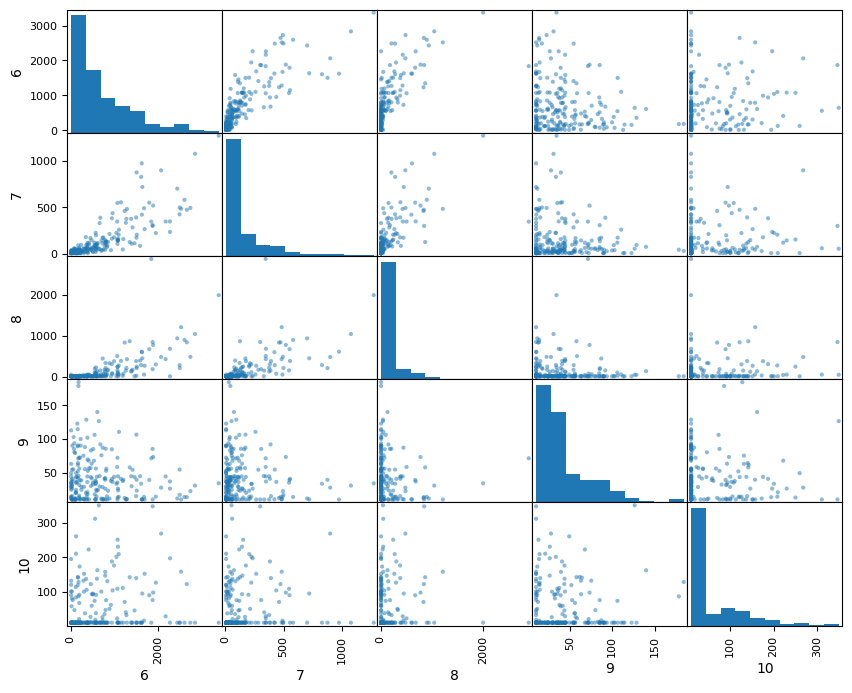

In [14]:

scatter_matrix(df_filtrado, figsize=(10, 8))
plt.show()


/tmp/ipykernel_8157/3798465629.py:2: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


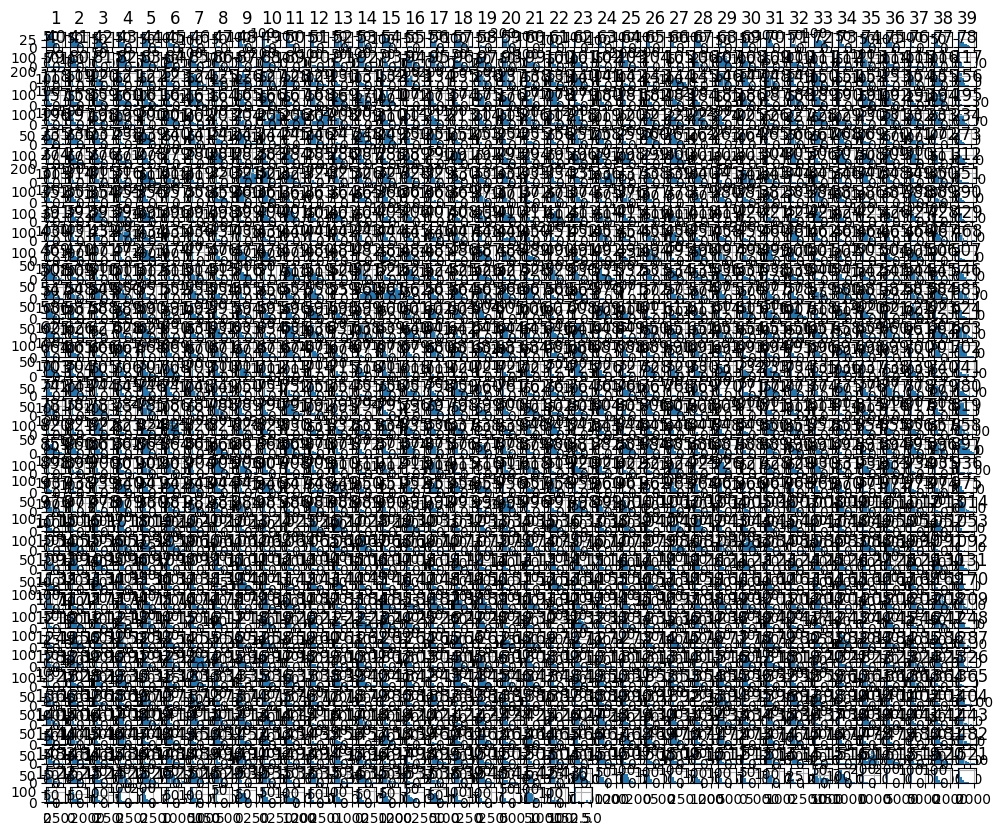

In [7]:
arquivo.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


In [15]:
df_filtrado.describe()


,6,7,8,9,10
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,695.227143,153.080739,145.789803,42.031232,54.452266
std,694.379319,211.856843,322.003558,32.663574,70.889810
min,10.000000,10.000000,10.000000,10.000000,10.000000
25%,163.840000,26.510000,10.000000,14.240000,10.000000
50%,480.020000,61.440000,10.000000,35.130000,10.000000
75%,1062.750000,174.890000,145.760000,55.855000,91.430000
max,3374.000000,1268.400000,2878.900000,184.490000,350.040000


#### Relação entre as colunas 6 até a 10 
###  Interpretação dos Dados

#### **Coluna 6**

* **Média**: \~695
* **Desvio padrão**: \~694 (quase igual à média → alta dispersão)
* **Mínimo**: 10
* **Máximo**: 3374
* **Distribuição**: muito assimétrica (a mediana é 480, mas o máximo é muito maior)

🔎 **Conclusão**: tem **valores extremos/outliers**, distribuição muito **positivamente assimétrica**.

---

#### **Coluna 7**

* **Média**: \~153
* **Desvio padrão**: \~211 (grande variação)
* **Mediana**: 61.44
* **Máximo**: 1268.4

🔎 **Conclusão**: novamente, assimetria positiva. Muitos valores baixos e alguns muito altos (provavelmente outliers).

---

#### **Coluna 8**

* **Média**: \~145.78
* **Desvio padrão**: \~322 (!) — maior do que a média.
* **25%, 50% (mediana)**: ambos são 10 → mais da metade dos dados é **10 fixo**.
* **Máximo**: 2878.9

🔎 **Conclusão**: mais de **50% dos dados têm o mesmo valor (10)** → pode ser:

* Um **valor fixo/padrão**
* Um **valor mínimo ou de saturação**
* Pode indicar **falta de informação real**, ou um **limite de detecção de um sensor**

---

#### **Coluna 9**

* **Média**: \~42
* **Desvio padrão**: \~32.6
* **Valores entre 10 e 184**

**Conclusão**: distribuição menos assimétrica, mas ainda com presença de valores mínimos em 10. Pode estar em uma escala mais estável.

---

#### **Coluna 10**

* **Média**: \~54.45
* **Mediana**: 10 (!)
* **Máximo**: 350
* **25% a 50%**: fixos em 10 → mais de 50% dos valores novamente são **10 fixo**

🔎 **Conclusão**: padrão semelhante ao da coluna 8. Provavelmente um **efeito de censura**, "zero técnico", ou **detecção mínima**.

---

### O que pode estar acontecendo com os valores `10` fixos?

Em bases de dados como espectroscopia, sensores ou sinais, é comum encontrar:

* Valores **mínimos fixos** (ex: saturação inferior do sensor);
* **Dados faltantes substituídos por um valor fixo**;
* Um valor que significa **"sem resposta"**, **"não detectado"**, ou similar.

🔍 **Recomendo verificar a documentação da base de dados** ou sua origem para entender o que o valor `10.0` significa.

---

### ✅ Próximos passos recomendados

1. **Verificar quantos `10.0` existem por coluna:**

```python
(df == 10.0).sum().sort_values(ascending=False).head(10)
```

2. **Visualizar a distribuição das colunas com histograma:**

```python
import matplotlib.pyplot as plt

df.iloc[:, 6:11].hist(bins=50, figsize=(12, 6))
plt.tight_layout()
plt.show()
```

3. **Substituir ou remover valores `10.0`, se necessário**, dependendo do que eles significam.

4. **Aplicar normalização ou PCA** para reduzir dimensões e tentar entender padrões.



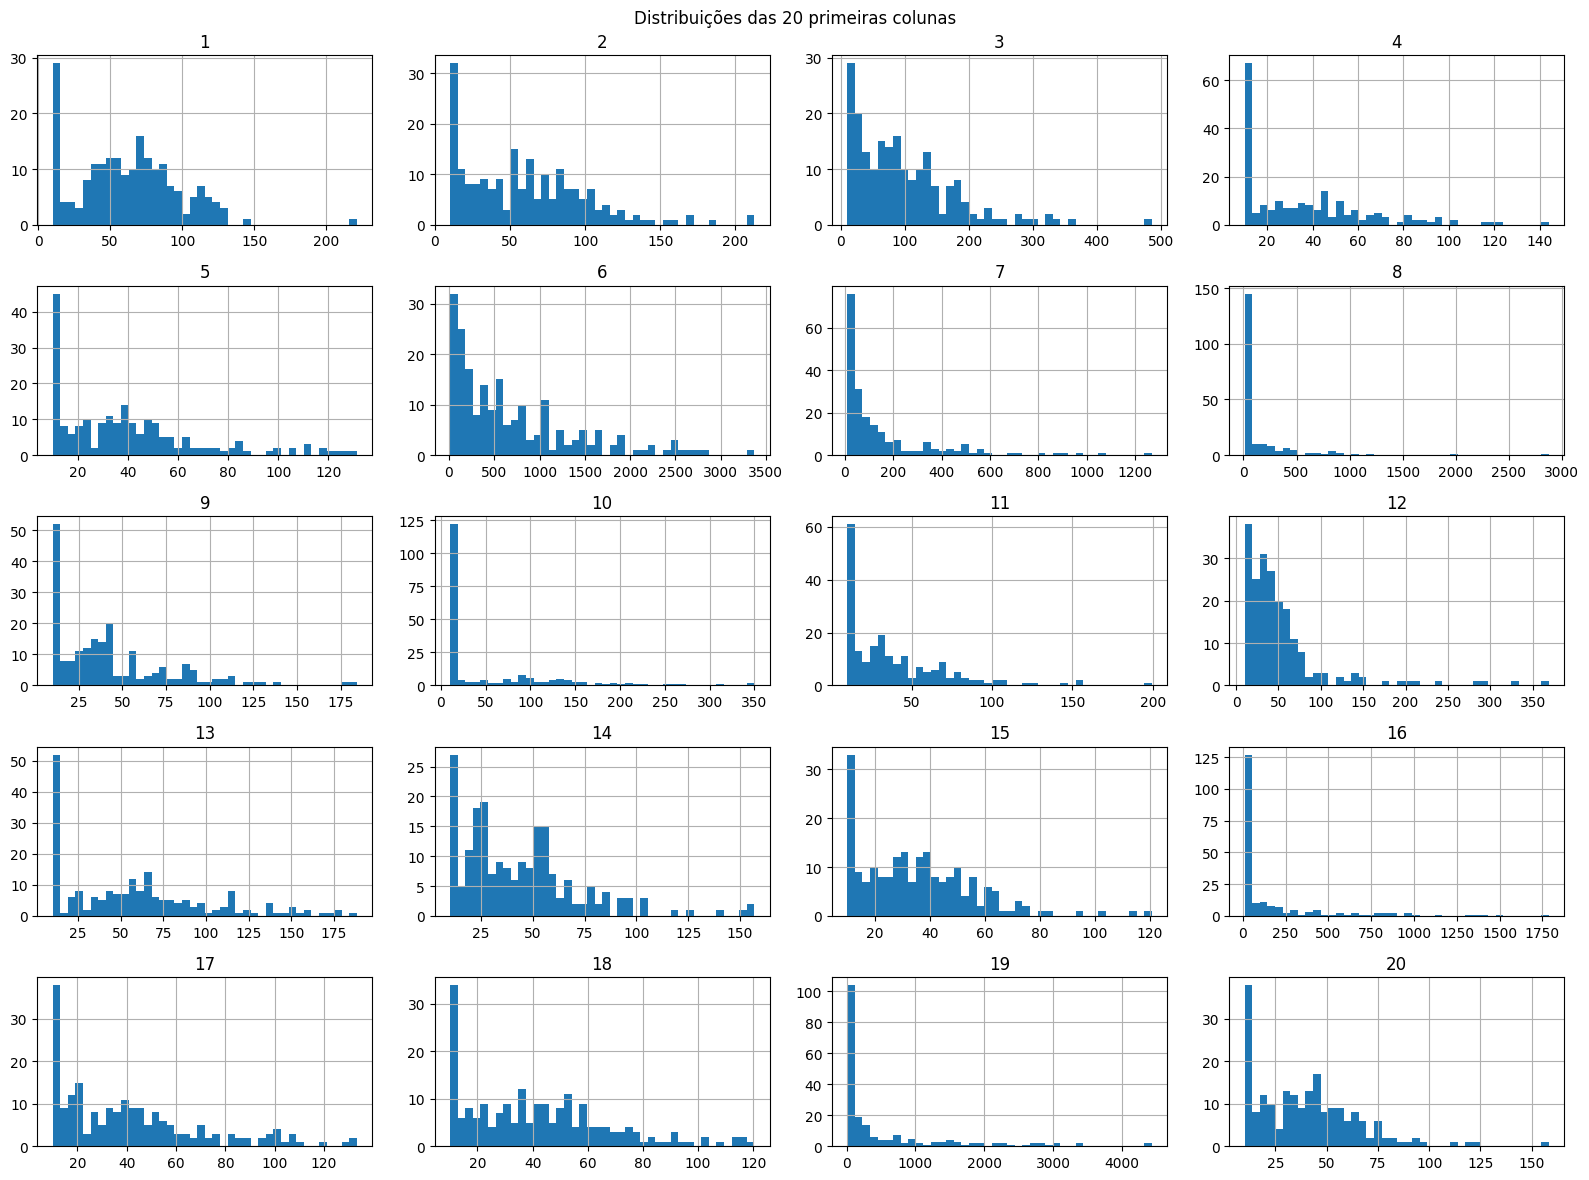

In [16]:
arquivo.iloc[:, :20].hist(bins=40, figsize=(16, 12))
plt.suptitle("Distribuições das 20 primeiras colunas")
plt.tight_layout()
plt.show()


In [ ]:

subset = arquivo.iloc[:, :20]  # ou selecione colunas de interesse
corr = subset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Matriz de Correlação - 20 primeiras colunas")
plt.show()
